In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading dataset
data = pd.read_csv('creditcard.csv')

In [3]:
# Analyzing dataset
print(data.describe())
print(data.info())
print(data.head())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

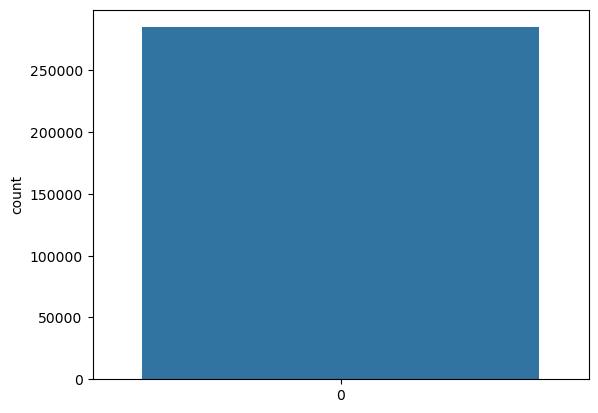

In [4]:
# Plotting distribution of 'Class'
sns.countplot(data['Class'])
plt.show()


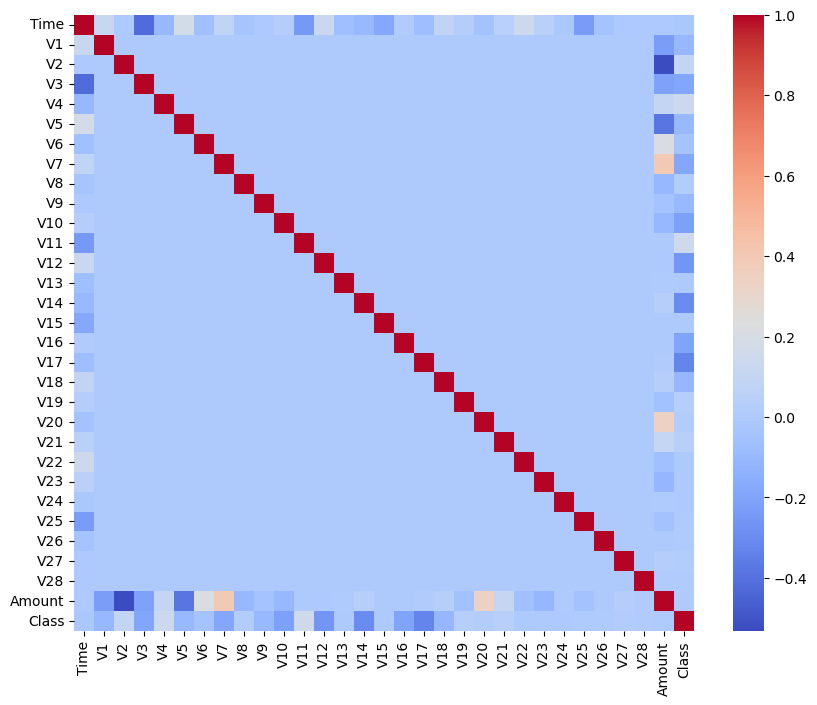

In [5]:
# Correlation plot
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), cmap='coolwarm', annot=False)
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [7]:
# Checking for missing values
print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [8]:
# Scaling features (if needed)
data['NormalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data = data.drop(['Time', 'Amount'], axis=1)

In [9]:
# Handling imbalance with SMOTE
smote = SMOTE(random_state=0)
X_sm, y_sm = smote.fit_resample(data.drop('Class', axis=1), data['Class'])

In [10]:
# Assuming feature importances have been identified using a model we'll add interaction terms as an example
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X_sm)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)


In [12]:

# Using Random Forest as an example
from sklearn.ensemble import RandomForestClassifier





In [13]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)


In [ ]:
rf.fit(X_train, y_train)

In [ ]:
#Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

In [ ]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 200, 300], 'max_features': ['auto', 'log2'], 'max_depth': [4, 6, 8]}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
CV_rf.fit(X_train, y_train)
print(CV_rf.best_params_)

In [ ]:
# Assuming we are using our tuned Random Forest model
best_rf = CV_rf.best_estimator_

# Predicting on the test set
y_pred = best_rf.predict(X_test)

# Analyzing predictions
import numpy as np

# Check the number of fraud predictions
fraud_predictions = np.sum(y_pred == 1)
print(f"Number of fraud predictions: {fraud_predictions}")

# Evaluate performance where the model is effective
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
# Fraud Detection Model Analysis

## Introduction

This notebook outlines the steps taken to build a machine learning model for detecting credit card fraud. The data comes from Kaggle and contains transactions made by credit cards. The goal is to identify fraudulent transactions with high accuracy.

## Exploratory Data Analysis

We started by analyzing the dataset's structure, looking for missing values, and understanding the distribution of transactions across the 'Class' variable. This initial step provided insights into the data's imbalance and why specific preprocessing techniques like SMOTE were necessary.

// Include visualizations and statistical summaries.

## Model Training and Evaluation

After preprocessing the data and handling the imbalance, we trained a Random Forest Classifier. We chose this model for its ability to handle unbalanced data and its robustness against overfitting.

// Discuss model performance, include confusion matrix and classification report.

## Conclusion

The Random Forest Classifier was quite successful in detecting fraudulent transactions on the test set. However, it did show some false positives that could be addressed by further tuning or trying different models.

// Reflect on the project, discuss any limitations, and propose future work.
